Waly NGOM, Guillaume CANAT

# Projet SES722 : Partie 1, Régression

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Description du jeu de données

In [2]:
with open("MROZ.DES") as f:
    content = f.read()
    print(content)

MROZ.DES

inlf      hours     kidslt6   kidsge6   age       educ      wage      repwage  
hushrs    husage    huseduc   huswage   faminc    mtr       motheduc  
fatheduc  unem      city      exper     nwifeinc  lwage     expersq   

  Obs:   753

  1. inlf                     =1 if in labor force, 1975
  2. hours                    hours worked, 1975
  3. kidslt6                  # kids < 6 years
  4. kidsge6                  # kids 6-18
  5. age                      woman's age in yrs
  6. educ                     years of schooling
  7. wage                     estimated wage from earns., hours
  8. repwage                  reported wage at interview in 1976
  9. hushrs                   hours worked by husband, 1975
 10. husage                   husband's age
 11. huseduc                  husband's years of schooling
 12. huswage                  husband's hourly wage, 1975
 13. faminc                   family income, 1975
 14. mtr                      fed. marginal tax rate facing 

## Question 1
Lire le fichier `mroz.raw`. Ne sélectionner que les observations pour lesquelles la variable *wage* est strictement positive.

In [3]:
# on utilise les noms de colonnes du fichier .DESC
col_names = ["inlf", "hours", "kidslt6", "kidsge6", "age", "educ", "wage",
             "repwage","hushrs","husage","huseduc", "huswage", "faminc",
             "mtr", "motheduc", "fatheduc", "unem", "city", "exper",
             "nwifeinc", "lwage", "expersq"]
# chargement des données
df = pd.read_csv("MROZ.raw", header=None, delim_whitespace=True, names=col_names)
df.head()

,inlf,hours,kidslt6,kidsge6,age,educ,wage,repwage,hushrs,husage,...,faminc,mtr,motheduc,fatheduc,unem,city,exper,nwifeinc,lwage,expersq
0,1,1610,1,0,32,12,3.354,2.65,2708,34,...,16310,0.7215,12,7,5.0,0,14,10.910060,1.210154,196
1,1,1656,0,2,30,12,1.3889,2.65,2310,30,...,21800,0.6615,7,7,11.0,1,5,19.499980,.3285121,25
2,1,1980,1,3,35,12,4.5455,4.04,3072,40,...,21040,0.6915,12,7,5.0,0,15,12.039910,1.514138,225
3,1,456,0,3,34,12,1.0965,3.25,1920,53,...,7300,0.7815,7,7,5.0,0,6,6.799996,.0921233,36
4,1,1568,1,2,31,14,4.5918,3.60,2000,32,...,27300,0.6215,12,14,9.5,1,7,20.100060,1.524272,49


In [4]:
# on remplace les "." par des 0 et on convertit la colonne en type float
df.loc[:, "wage"] = df["wage"].replace({".":0.0}).astype(float)
# on filtre le dataframe comme demandé
df = df.loc[df["wage"] > 0, :]

## Question 2
Faire les statistiques descriptives du salaire, de l’age et de l’éducation pour l’ensemble des
femmes puis, pour les femmes dont le salaire du mari est supérieure au 65 ème percentile de
l’échantillon, puis pour les femmes dont le salaire du mari est inférieur au 65 ème percentile de
l’échantillon. Commenter.

In [5]:
# stat descriptives pour les femmes (ie l'ensembe du dataset)
df[["wage", "age", "educ"]].describe()

,wage,age,educ
count,428.000000,428.000000,428.000000
mean,4.177682,41.971963,12.658879
std,3.310282,7.721084,2.285376
min,0.128200,30.000000,5.000000
25%,2.262600,35.000000,12.000000
50%,3.481900,42.000000,12.000000
75%,4.970750,47.250000,14.000000
max,25.000000,60.000000,17.000000


In [6]:
# stat descriptives pour les femmes dont le salaires du mari
# est supérieur au 65ème percentile de l'échantillon
percent_65 = np.percentile(df["huswage"], 65)
df.loc[df["huswage"] > percent_65, ["wage", "age", "educ"]].describe()

,wage,age,educ
count,148.000000,148.00000,148.000000
mean,5.139315,42.52027,13.520270
std,4.351728,7.35168,2.345845
min,0.213700,30.00000,5.000000
25%,2.561925,36.00000,12.000000
50%,4.008050,43.00000,13.000000
75%,6.516300,48.00000,16.000000
max,25.000000,59.00000,17.000000


In [7]:
# stat descriptives pour les femmes dont le salaires du mari
# est inférieur au 65ème percentile de l'échantillon
df.loc[df["huswage"] <= percent_65, ["wage", "age", "educ"]].describe()

,wage,age,educ
count,280.000000,280.000000,280.000000
mean,3.669390,41.682143,12.203571
std,2.458277,7.906875,2.119542
min,0.128200,30.000000,6.000000
25%,2.151600,35.000000,12.000000
50%,3.203550,41.000000,12.000000
75%,4.539500,47.000000,12.000000
max,22.500000,60.000000,17.000000


Le salaire moyen (et médian) des femmes dont les maris ont un salaire inférieur au 65ème percentile est inférieur aux autre femmes.

L'écart-type du salaire des femmes dont le mari à un salaire supérieur au 65ème percentile est plus important.

## Question 3
Faire l'histogramme de la variable *wage*. Supprimer les observations qui sont à plus de 3 écart-types de la moyenne et refaire l’histogramme.


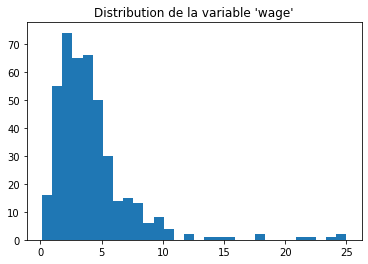

In [8]:
plt.figure(figsize=(6,4))
plt.hist(df["wage"], bins=30)
plt.title("Distribution de la variable 'wage'")
plt.show()

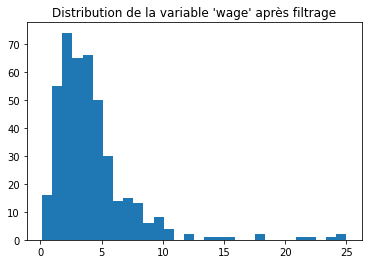

In [9]:
# mask booléen : valeur absolue de l'écart entre l'observation et la moyenne
# supérieur à 3 x l'écart-type
mask = np.abs(df["wage"] - df["wage"].mean()) <= 3*df["wage"].std()
# filtrage du dataframe avec ce mask
# df = df.loc[mask,:]

# on refait l'histogramme
plt.figure(figsize=(6,4))
plt.hist(df.loc[:, "wage"], bins=30)
plt.title("Distribution de la variable 'wage' après filtrage")
plt.show()

## Question 4
Calculer les corrélations *motheduc* et *fatheduc*. Expliquer le problème de multi-collinéarité. Commenter.

In [10]:
correl = np.corrcoef(df["motheduc"], df["fatheduc"])[1,0]
print(f"Coéfficient de corrélation entre 'motheduc' et 'fatheduc' : {correl:.4f}")

Coéfficient de corrélation entre 'motheduc' et 'fatheduc' : 0.5541


Commentaire : Les deux variables sont moyennement corrélées.

Multi-colinéarité : si des variables sont colinéaires alors la matrice X n'est pas de plein rang et donc pas inversible. On aura donc pas de solution unique pour les paramètres du modèle.

## Question 5
Faites un graphique en nuage de point entre *wage* et *educ*. S'agit-il d'un effet "toute chose étant égale par ailleurs ?"

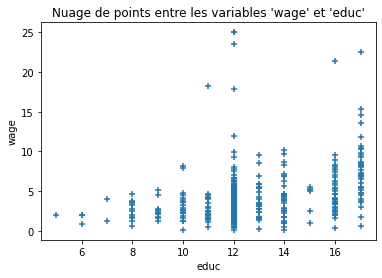

In [11]:
plt.figure(figsize=(6,4))
plt.scatter(df["educ"], df["wage"],  marker='+')
plt.title("Nuage de points entre les variables 'wage' et 'educ'")
plt.xlabel("educ")
plt.ylabel("wage")
plt.show()

Commentaire : Pour pouvoir extraire de l'information de ce type graphique, on doit en effet supposer *toute chose égale par ailleurs*, cependant on voit bien que ça n'est pas le cas ici puisque pour une valeur d'*educ* on peut avoir de nombreuses valeurs de *wage* très disparates (comme par exemple pour *educ* = 12).

## Question 6

Quelle est l'hypothèse fondamentale qui garantit des estimateurs non biaisés ? Expliquer le biais de variable omise.

L’hypothèse fondamentale garantissant des estimateurs non biaisés:

1. Les variables non observées $\varepsilon$ sont de moyenne nulle i.e $\mathbb{E}(\varepsilon)=0$.

2. Les variables observées $X$ et les variables non observées $\varepsilon$ sont non corrélées i.e $\mathbb{E}(\varepsilon|x)= 0.$

On parle de biais de variable omise lorsqu’une des variables explicatives (une composante de X) corrélée à la fois avec la variable expliquée et avec le terme d’erreur n’est pas prise en compte dans l’équation. Dans ce cas, l’hypothèse fondamentale garantissant que les estimateurs MCO sont non biaisés n’est plus valide.

## Question 7
Faire la régression du log de *wage* en utilisant comme variables explicatives une constante, *city, educ, exper, nwifeinc, kidslt6, kidsgt6*. Commentez l'histogramme des résidus.

In [12]:
X = df[["city", "educ", "exper", "nwifeinc", "kidslt6", "kidsge6"]]
X = sm.add_constant(X)
y = np.log(df["wage"])
model = sm.OLS(y,X).fit()

In [13]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     12.92
Date:                Tue, 10 May 2022   Prob (F-statistic):           2.00e-13
Time:                        16:16:11   Log-Likelihood:                -431.92
No. Observations:                 428   AIC:                             877.8
Df Residuals:                     421   BIC:                             906.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3990      0.207     -1.927      0.0

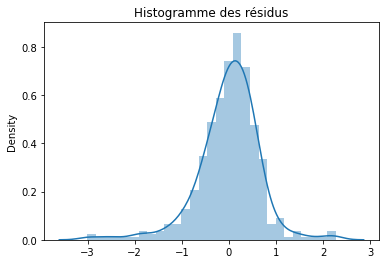

In [14]:
plt.figure(figsize=(6,4))
sns.distplot(model.resid)
plt.title("Histogramme des résidus")
plt.show()

Commentaire : la distribution des résidus a une forme quasi-gaussienne bien que l'on note une légère disymmétrie (skewness) et "longue queue" à gauche (kurtosis).

## Question 8

Tester l'hypothèse de non significativité de *nwifeinc* avec un seuil de significativité de 1%, 5% et 10% (test alternatif des deux côtés). Commentez les p-values.

Test de student pour le $k$-ième coéfficient de regression $\beta_k$ :

 - estimateur de $\sigma^2$ : $\hat{\sigma}^2 = \frac{1}{n-p-1}\|Y - X \beta\|^2$, avec $n$ le nombre d'observations et $p+1$ le rang de $X$ (constante inclue),

 - $\hat{s}_k^2$ = $n (X^TX)^{-1}_{k,k}$ , le $k$-ième élément de la diagonale

 - alors
$$T = \sqrt \frac{n}{\hat{s}_k^2 \hat{\sigma}^2_{k}}(\hat{\beta}_{k} - \beta^{*}_{k}) \sim \mathcal{T}_{n-p-1}$$

Hypothèse nulle : $\beta^{*}_{k}=0$. On a donc la statistique de test suivante :
$$T = \sqrt \frac{n}{\hat{s}_k^2 \hat{\sigma}^2_{k}}\hat{\beta}_{k} \sim \mathcal{T}_{n-p-1}$$

In [15]:
from scipy.stats import t

def calc_stat(X, y, col_name, h0):
    """
    Calcul de la statistique de Student pour le coéfficient de régression correspondant
    à la variable `col_name` avec hypothèse nulle : coéfficient = `h0`.
    """
    # on fit le modèle
    model = sm.OLS(y, X).fit()
    # on récupère le numéro de colonne qui nous intéresse
    col_number = np.where(col_name == X.columns)[0]
    n, p = X.shape
    # sigma chapeau
    sig2 = model.resid @ model.resid / (n-p)
    # s chapeau
    s_hat = np.diag(np.linalg.inv(X.T @ X) * n)[col_number]
    # stat de student
    T_stat = float(np.sqrt(n/(s_hat*sig2)) * (model.params[col_name] - h0))
    p_val = t.sf(np.abs(T_stat), X.shape[0] - X.shape[1])*2
    print(f"T-Stat: {T_stat:.3f}, p-value: {p_val:.2e}")
    return T_stat, p_val

In [16]:
def test_stat(T_stat, q, X):
    """
    Test de Student avec niveau de confiance `q`
    """
    n, p = X.shape
    n, p = X.shape
    perc = t.ppf(q, n-p)
    seuil = (1-q)*2
    if perc < np.abs(T_stat):
        print(f"Avec seuil de significativité de {seuil*100:.2f}%, on rejette H0")
    else:
        print(f"Avec seuil de significativité de {seuil*100:.2f}%, on ne rejette pas H0")

In [17]:
T_stat, p_val = calc_stat(X, y, "nwifeinc", 0)
test_stat(T_stat, 0.995, X)
test_stat(T_stat, 0.975, X)
test_stat(T_stat, 0.95, X)
test_stat(T_stat, 1-p_val/2, X)

T-Stat: 1.466, p-value: 1.43e-01
Avec seuil de significativité de 1.00%, on ne rejette pas H0
Avec seuil de significativité de 5.00%, on ne rejette pas H0
Avec seuil de significativité de 10.00%, on ne rejette pas H0
Avec seuil de significativité de 14.34%, on rejette H0


La p-valeur est le plus petit seuil à partir duquel on peut rejeter H0

## Question 9

Tester l’hypothèse que le coefficient associé à *nwifeinc* est égal à 0.01 avec un seuil de significativité de 5% (test à alternatif des deux côtés).

In [18]:
# stat de student
T_stat, p_val = calc_stat(X, y, "nwifeinc", 0.01)
test_stat(T_stat, 0.975, X)

T-Stat: -1.536, p-value: 1.25e-01
Avec seuil de significativité de 5.00%, on ne rejette pas H0


## Question 10

Tester l’hypothèse jointe que le coefficient de *nwifeinc* est égal à 0.01 et que celui de *city* est égal à 0.05.

On pose $y$ = *wage* et $X$ = (*constante, city, educ, exper, nwifeinc, kidslt6, kidsge6*), ie $X_0$ = *constante*, $X_1$ = *city*, ... , $X_6$ = *kidsge6*.

On a donc le modèle $\hat{y} = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_3 + \beta_4 X_4 + \beta_5 X_5 + \beta_6 X_6$.

On veut tester l'hypothèse $H_0:\{ \beta_4 = 0.01 , \beta_1 = 0.05\} \iff \{ \theta = \beta_4 - 0.01 = 0, \theta' = \beta_1 - 0.05 = 0 \}$. On réécrit le modèle ainsi :
$$
\hat{y} - 0.01 X_4 - 0.05 X_2 = \beta_0 + \theta' X_1 + \beta_2 X_2 + \beta_3 X_3 + \theta X_4 + \beta_5 X_5 + \beta_6 X_6
$$

In [19]:
from scipy.stats import f

def calc_ssr(X, y):
    """
    Caclul de la somme des résidus au carré
    """
    model = sm.OLS(y, X).fit()
    u = model.resid
    SSR = u.T @ u
    return SSR

def calc_fisher(SSR0, SSR1, c, ddl):
    """
    Calcul de la statistique de Fisher avec `c` nombre de contraintes
    et `ddl` nombre de degrés de liberté du modèle non contraint
    """
    F = ((SSR1 - SSR0)/c) / (SSR0/ddl)
    p_val = f.sf(F, c, ddl)
    print(f"F-stat : {F:.3f}, p-value : {p_val:.2e}")
    return F, p_val

def fisher_test(X, y, constrained_cols, q):
    """
    Test de Fisher avec contrainte sur les variables `constrained_cols`
    et niveau de confiance `q`.
    """
    n, p = X.shape
    # on calcule la somme des carrés des résidus du modèle non contraint
    SSR0 = calc_ssr(X, y)
    # colonnes du modèle contraint
    new_cols = list(set(X.columns) - set(constrained_cols))
    # modèle contraint
    X1 = X.loc[:, new_cols]
    SSR1 = calc_ssr(X1, y)
    c = len(constrained_cols) # nombre de contraintes
    ddl = n - p # dégrés de liberté
    # Stat de Fisher
    F, p_val = calc_fisher(SSR0, SSR1, c, ddl)
    perc = f.ppf(q, c, ddl)
    if perc < F:
        print(f"Avec seuil de significativité de {(1-q)*100:.2f}%, on rejette H0")
    else:
        print(f"Avec seuil de significativité de {(1-q)*100:.2f}%, on ne rejette pas H0")

In [20]:
#df.loc[:,"nwifeinc_city"] = 0.01 * df["nwifeinc"] + 0.05 * df["city"]
X = df[["city", "educ", "exper", "nwifeinc", "kidslt6", "kidsge6"]]
X = sm.add_constant(X)
y = np.log(df["wage"]) - 0.01 * df["nwifeinc"] - 0.05 * df["city"]
model = sm.OLS(y, X).fit()

fisher_test(X, y, ["city", "nwifeinc"], 0.95)

F-stat : 1.337, p-value : 2.64e-01
Avec seuil de significativité de 5.00%, on ne rejette pas H0


In [21]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     11.02
Date:                Tue, 10 May 2022   Prob (F-statistic):           2.03e-11
Time:                        16:16:12   Log-Likelihood:                -431.92
No. Observations:                 428   AIC:                             877.8
Df Residuals:                     421   BIC:                             906.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3990      0.207     -1.927      0.0

## Question 11
Tester l’hypothèse jointe que $\beta_{nwifeinc} + \beta_{city} =0.1$ et $\beta_{educ} + \beta_{exper} = 0.1$.

On veut tester l'hypothèse jointe $\beta_1 + \beta_4 = 0.1$ et $\beta_2 + \beta_3 = 0.1$.
On peut écrire :
$$
\theta_1 = \beta_1 + \beta_4 - 0.1 = 0 \mbox{ et } \theta_2 = \beta_2 + \beta_3 - 0.1 = 0
$$
$$
\iff
$$
$$ \beta_1 = \theta_1 - \beta_4 + 0.1 \mbox{ et } \beta_2 = \theta_2 - \beta_3 + 0.1 $$

On réécrit ainsi le modèle:
$$
\hat{y} - 0.1 X_1 - 0.1 X_2 = \beta_0 + \theta_1 X_1 +  \theta_2 X_2 + \beta_3 (X_3 - X_2) + \beta_4 (X_4 - X_1) + \beta_5 X_5 + \beta_6 X_6
$$

Et on réalise un test de Fisher sur $H_0$ : \{ $\theta_1 = 0 \mbox{ et } \theta_2 = 0 \}$


In [22]:
y = np.log(df["wage"]) - 0.1 * df["city"] - 0.1 * df["educ"]

df.loc[:, "newvar1"] = df["exper"] - df["educ"]
df.loc[:, "newvar2"] = df["nwifeinc"] - df["city"]

X = df[["city", "educ", "newvar1", "newvar2", "kidslt6", "kidsge6"]]
X = sm.add_constant(X)

fisher_test(X, y, ["city", "educ"], 0.95)

F-stat : 0.923, p-value : 3.98e-01
Avec seuil de significativité de 5.00%, on ne rejette pas H0


## Question 12

Faites une représentation graphique de la manière dont le salaire augmente avec l’éducation et l'expérience professionnelle. Commentez.

Nous faisons ici:

1. une représentation de *wage* en fonction de *exper* selon que le niveau d'éducation soit inférieur ou supérieur à la valeur médiane de la varibale *educ* (On peut le faire avec chaque quartile).

2. une représentation (dans l'espace à trois dimensions) de *wage* en fonction de *educ* et *exper*, avec visualisation de l'hyperplan de regression.


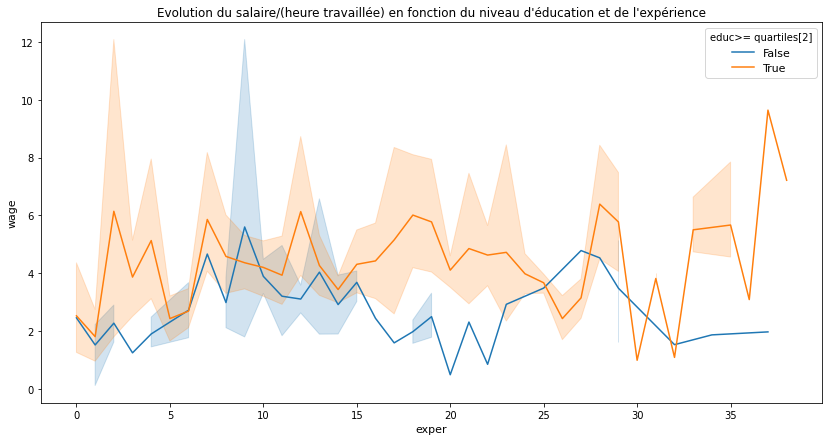

In [23]:
quartiles = [np.percentile(df['huseduc'],q) for q in [0, 25, 50, 75, 100]]
df2 = df.copy()
df2["educ>= quartiles[2]"] = df2.educ >= quartiles[2]
_, axes = plt.subplots(figsize=(14, 7))

with sns.plotting_context(rc={"legend.fontsize":11}):
    sns.lineplot(x="exper", y="wage", hue="educ>= quartiles[2]", data=df2, ax=axes)
    plt.xlabel("exper", fontsize=11)
    plt.ylabel("wage", fontsize=11)

axes.set_title("Evolution du salaire/(heure travaillée) en fonction du niveau d'éducation et de l'expérience");


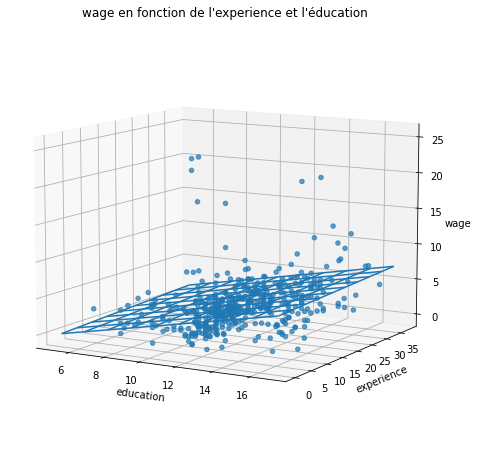

In [24]:
X = df[["educ", "exper"]]
X = sm.add_constant(X)
y = df["wage"]
model = sm.OLS(y, X)
results = model.fit()

xx = np.linspace(df["educ"].min(), df["educ"].max(),10)
yy = np.linspace(df["exper"].min(), df["exper"].max(),10)
xx, yy = np.meshgrid(xx, yy)

exog = np.column_stack((xx.ravel(), yy.ravel()))
exog = sm.add_constant(exog)

zz = model.predict(params=results.params, exog=exog).reshape(xx.shape)

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(projection='3d')
ax.plot_wireframe(xx,yy,zz)
ax.scatter(df["educ"], df["exper"], df["wage"], alpha=0.7)
ax.set_xlabel('education')
ax.set_ylabel('experience')
ax.set_zlabel('wage')
ax.view_init(10, -60)
ax.set_title("wage en fonction de l'experience et l'éducation")
plt.show()

In [25]:
print(f"Coéfficients de regression :\n{results.params}")

Coéfficients de regression :
const   -2.431687
educ     0.496634
exper    0.024739
dtype: float64


a. On constate que le salaire *wage* est plus corrélé au niveau d'éducation qu'à l'expérience professionnelle. On peut  d'ailleurs le voir aussi en chiffres avec la matrice de covariance ci-dessous.

b. En début et en fin de carrière, on constate que le niveau d'éducation a une forte influence sur le salaire.

c. Entre 8 ans et 13 ans d'expérience, niveau d'éducation n'a pas beaucoup d'influence .

d. Par ailleurs, pour les personnes qui ont un niveau d'éducation supérieur à la valeur médiane de la varibale *educ*, le salaire croit fortement avec à l'expérience à l'opposé des personnes ayant un niveau d'éducation inférieur à cette valeur médiane.

In [26]:
df2[["wage","educ","exper"]].cov()

,wage,educ,exper
wage,10.957969,2.586967,1.466479
educ,2.586967,5.222942,-0.279958
exper,1.466479,-0.279958,64.897897


## Question 13

Tester l’égalité des coefficients associés aux variables *kidsgt6* et *kidslt6*. Interprétez.

En reprenant les notations de la question 11, on veut tester  $H_0 : \beta_5 = \beta_6 \iff \theta = \beta_5 - \beta_6 = 0$. On peut donc réécrire le modèle avec $\beta_5 = \theta + \beta_6$.

On a donc :
$$
\hat{y} = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_3 + \beta_4 X_4 + (\theta + \beta_6) X_5 + \beta_6 X_6 \\
\iff \\
\hat{y} = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_3 + \beta_4 X_4 + \theta X_5 + \beta_6 (X_5 + X_6)
$$

In [27]:
y = np.log(df["wage"])
df.loc[:, "newvar1"] = df["kidsge6"] + df["kidslt6"]
X = df[["city", "educ", "exper", "nwifeinc", "kidslt6", "newvar1"]]
X = sm.add_constant(X)

T_stat, p_val = calc_stat(X, y, "kidslt6", 0)
test_stat(T_stat, 0.975, X)

T-Stat: -0.372, p-value: 7.10e-01
Avec seuil de significativité de 5.00%, on ne rejette pas H0


On peut dire ici que l'âge des enfants (moins de 6 ans ou entre 6 ans et 18 ans) n'aurait pas d'influence dans ce modèle.


## Question 14

Faire le test d'hétéroscédasticité de forme linéaire en donnant la p-valeur. Déterminer la ou les sources d’hétéroscédasticité et corriger avec les méthodes vues en cours. Comparer les écarts-types des coefficients estimés avec ceux obtenus à la question 7. Commenter.

In [28]:
X = df[["city", "educ", "exper", "nwifeinc", "kidslt6", "kidsge6"]]
X = sm.add_constant(X)
y = np.log(df["wage"])
model = sm.OLS(y, X).fit()
# résidus au carré
u2 = model.resid ** 2
# test de fisher avec comme nouvelle target 'u2' et modèle contraint
# conservant uniquement la constante
fisher_test(X, u2, ["city", "educ", "exper", "nwifeinc", "kidslt6", "kidsge6"], 0.95)

F-stat : 2.009, p-value : 6.33e-02
Avec seuil de significativité de 5.00%, on ne rejette pas H0


On remarque que la p-valeur est de 0.063 donc tout de même proche de 5%. On pourrait rejeter l'hypothèse d'homoscedasticité avec un seuil de 6,5%.

Essayons de déterminer les éventuelles sources d'hétéroscedasticité

In [29]:
cols = ["city", "educ", "exper", "nwifeinc", "kidslt6", "kidsge6"]

for col in cols:
    print(f"--------- Test de student pour la variable {col} ---------")
    T_stat, p_val = calc_stat(X, u2, col, 0)
    test_stat(T_stat, 0.975, X)

--------- Test de student pour la variable city ---------
T-Stat: 0.883, p-value: 3.78e-01
Avec seuil de significativité de 5.00%, on ne rejette pas H0
--------- Test de student pour la variable educ ---------
T-Stat: 0.536, p-value: 5.93e-01
Avec seuil de significativité de 5.00%, on ne rejette pas H0
--------- Test de student pour la variable exper ---------
T-Stat: -2.423, p-value: 1.58e-02
Avec seuil de significativité de 5.00%, on rejette H0
--------- Test de student pour la variable nwifeinc ---------
T-Stat: -0.683, p-value: 4.95e-01
Avec seuil de significativité de 5.00%, on ne rejette pas H0
--------- Test de student pour la variable kidslt6 ---------
T-Stat: 0.960, p-value: 3.37e-01
Avec seuil de significativité de 5.00%, on ne rejette pas H0
--------- Test de student pour la variable kidsge6 ---------
T-Stat: 0.661, p-value: 5.09e-01
Avec seuil de significativité de 5.00%, on ne rejette pas H0


On voit que pour la variable *exper* on rejette l'hypothèse de nullité du coéfficient. On peut donc tenter de corriger l'hétéroscedasticité en réalisant une régression WLS (Weighted Least Square) avec comme poids $w = \frac{1}{\sqrt{exper}}$.

In [30]:
# on ajoute 1e-6 pour éviter les valeurs nulles
# NB: sm.WLS calcule lui même sqrt(h)
h = df["exper"] + 1e-6
mod_wls = sm.WLS(y, X, weights=1.0/h)
res_wls = mod_wls.fit()
print(res_wls.summary())

                            WLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.999
Model:                            WLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.210e+05
Date:                Tue, 10 May 2022   Prob (F-statistic):               0.00
Time:                        16:16:14   Log-Likelihood:                -1208.0
No. Observations:                 428   AIC:                             2430.
Df Residuals:                     421   BIC:                             2458.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.7627      0.865     -5.506      0.0

On a corrigé l'hétéroscédasticité mais les ecarts-types des coéfficients ont augmenté, autrement dit on a perdu un peu en précision.

## Question 15

Tester le changement de structure de la question 8 entre les femmes qui ont plus de 43 ans et les autres : test sur l'ensemble des coefficients. Donnez les p-valeurs.

In [31]:
cols = ["city", "educ", "exper", "nwifeinc", "kidslt6", "kidsge6"]
# on divise le dataset en 2 pour appliquer la méthode simple
mask = df["age"] >= 43
df1 = df.loc[mask, cols]
df2 = df.loc[~mask, cols]
y1 = np.log(df.loc[mask, "wage"])
y2 = np.log(df.loc[~mask, "wage"])
X1 = sm.add_constant(df1)
X2 = sm.add_constant(df2)

# on calcule les SSR pour les 2 datasets ainsi créés
SSR01 = calc_ssr(X1,y1)
SSR02 = calc_ssr(X2, y2)
SSR0 = SSR01 + SSR02

# modèle contraint
X = df.loc[:, cols]
X = sm.add_constant(X)
SSR1 = calc_ssr(X, y)

c = X1.shape[1]
ddl = X.shape[0] - c*2

F, p_val = calc_fisher(SSR0, SSR1, c, ddl)

F-stat : 1.185, p-value : 3.10e-01


On ne rejette pas l'hypothèse de non significativité des variables binaires. Donc a priori pas de changement de structure.

## Question 16

Ajouter au modèle de la question 7 la variable *huseduc*. Faire ensuite la même régression en décomposant la variable *huseduc* en 4 variables binaires construites selon votre choix. Faire le test de non significativité de l’ensemble des variables binaires. Donnez les p-valeurs et commentez.

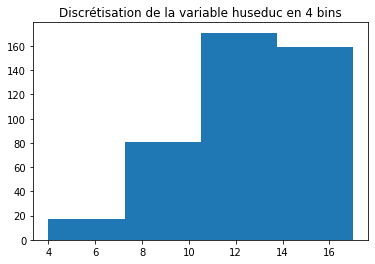

In [32]:
plt.figure(figsize=(6,4))
plt.hist(df["huseduc"], bins=4)
plt.title("Discrétisation de la variable huseduc en 4 bins")
plt.show()

# 4 bins uniformément répartis sur l'espace des valeurs prises par `huseduc`
df.loc[:, "huseduc_cat"] = pd.cut(df["huseduc"], bins=4, labels=[f"huseduc_{i}" for i in range(4)])
# 4 bins équilibrées, ie contenant à peu près le même nombre d'observations
df.loc[:, "huseduc_qcat"] = pd.qcut(df["huseduc"], q=4, labels=[f"huseduc_q{i}" for i in range(4)])

In [33]:
# On teste avec les bins uniformes
X = pd.concat((df.loc[:, cols], pd.get_dummies(df["huseduc_cat"])), axis=1)
X = sm.add_constant(X)
y = np.log(df["wage"])
fisher_test(X, y, ["huseduc_0","huseduc_1","huseduc_2", "huseduc_3"], 0.95)

F-stat : 1.016, p-value : 3.99e-01
Avec seuil de significativité de 5.00%, on ne rejette pas H0


In [34]:
# On teste avec les bins équilibrés
X = pd.concat((df.loc[:, cols], pd.get_dummies(df["huseduc_qcat"])), axis=1)
X = sm.add_constant(X)
y = np.log(df["wage"])
fisher_test(X, y, ["huseduc_q0","huseduc_q1","huseduc_q2", "huseduc_q3"], 0.95)

F-stat : 1.318, p-value : 2.62e-01
Avec seuil de significativité de 5.00%, on ne rejette pas H0


Dans les deux cas on ne peut pas rejeter l'hypothèse de non significativité des variables binaires.

# Partie 2 : Séries temporelles

## Question 1
Importer les données du fichier `quarterly.xls` (corriger le problème éventuel d’observations manquantes)

In [35]:
df = pd.read_excel("quarterly.xls")
df.head()

,DATE,FFR,Tbill,Tb1yr,r5,r10,PPINSA,Finished,CPI,CPICORE,M1NSA,M2SA,M2NSA,Unemp,IndProd,RGDP,Potent,Deflator,Curr
0,1960Q1,3.93,3.87,4.57,4.64,4.49,31.67,33.20,29.40,18.92,140.53,896.1,299.40,5.13,23.93,2845.3,2824.2,18.521,31.830
1,1960Q2,3.70,2.99,3.87,4.30,4.26,31.73,33.40,29.57,19.00,138.40,903.3,300.03,5.23,23.41,2832.0,2851.2,18.579,31.862
2,1960Q3,2.94,2.36,3.07,3.67,3.83,31.63,33.43,29.59,19.07,139.60,919.4,305.50,5.53,23.02,2836.6,2878.7,18.648,32.217
3,1960Q4,2.30,2.31,2.99,3.75,3.89,31.70,33.67,29.78,19.14,142.67,932.8,312.30,6.27,22.47,2800.2,2906.7,18.700,32.624
4,1961Q1,2.00,2.35,2.87,3.64,3.79,31.80,33.63,29.84,19.17,142.23,948.9,317.10,6.80,22.13,2816.9,2934.8,18.743,32.073


In [36]:
df.isnull().sum()

DATE        0
FFR         0
Tbill       0
Tb1yr       0
r5          0
r10         0
PPINSA      0
Finished    0
CPI         0
CPICORE     0
M1NSA       0
M2SA        0
M2NSA       0
Unemp       0
IndProd     0
RGDP        0
Potent      0
Deflator    0
Curr        0
dtype: int64

Il n'y a pas de valeur manquante

## Question 2
Stationnariser la série de *CPI* en utilisant la méthode de régression qui inclue un terme de tendance dont la forme fonctionnelle est à choisir (linéaire, quadratique, log, exponentielle, ...)

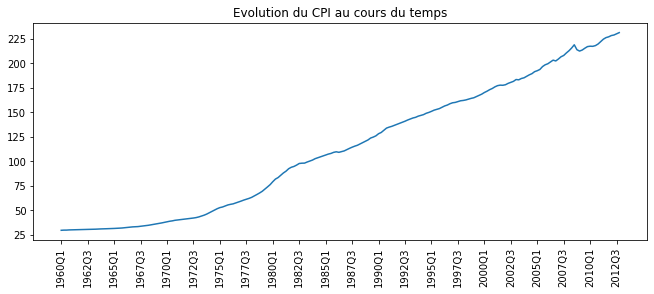

In [37]:
plt.figure(figsize=(11,4))
plt.plot(df["DATE"], df["CPI"])
plt.xticks([x for i, x in enumerate(df["DATE"]) if i%10==0], rotation=90)
plt.title("Evolution du CPI au cours du temps")
plt.show()

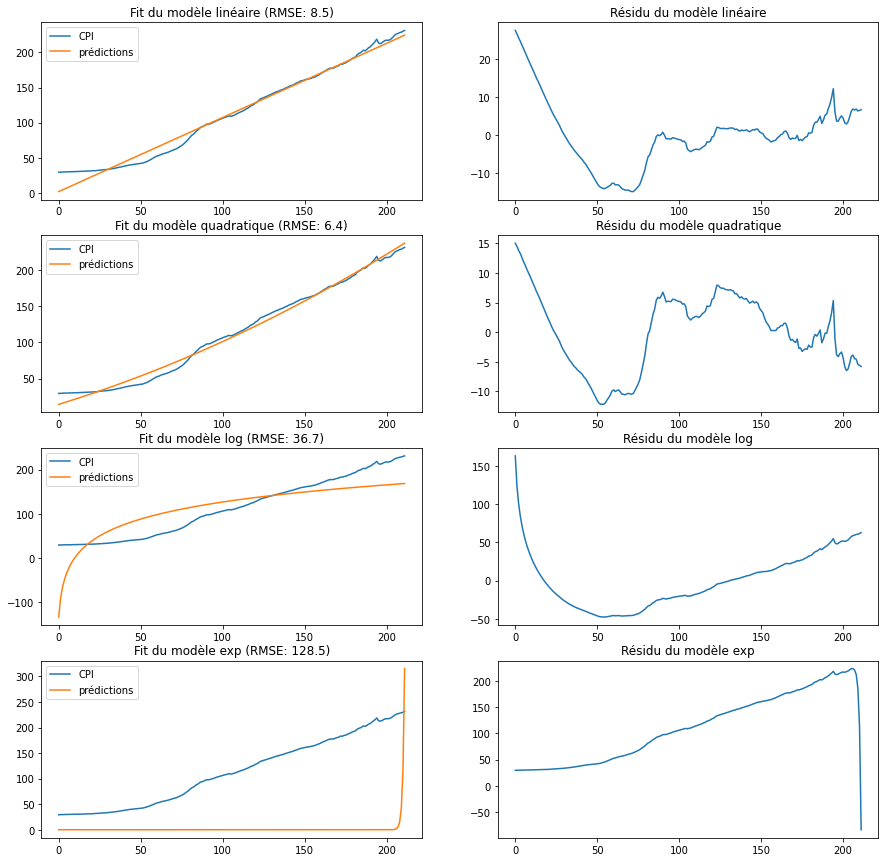

In [38]:
from sklearn.metrics import mean_squared_error

X = np.arange(1, len(df)+1)
y = df["CPI"]
func_type = ["linéaire", "quadratique", "log", "exp"]
X_list = [X, np.column_stack((X, X**2)), np.log(X), np.exp(X)]

fig, axes = plt.subplots(len(func_type), 2, figsize=(15, 15))
all_preds = []

for i, X in enumerate(X_list):
    X = sm.add_constant(X)
    model = sm.OLS(y, X)
    results = model.fit()
    preds = model.predict(results.params)
    all_preds.append(preds)
    rmse = np.sqrt(mean_squared_error(y, preds))
    axes[i, 0].plot(y, label="CPI")
    axes[i, 0].plot(preds, label="prédictions")
    axes[i, 0].set_title(f"Fit du modèle {func_type[i]} (RMSE: {rmse:.1f})")
    axes[i, 0].legend()
    axes[i, 1].plot(results.resid)
    axes[i, 1].set_title(f"Résidu du modèle {func_type[i]}")

plt.show()

La méthode de regression avec la tendance quadratique semble la mieux adaptée (RMSE plus petite).

## Question 3

Stationnariser la série de *CPI* en utilisant un moyenne mobile centrée 5x5.

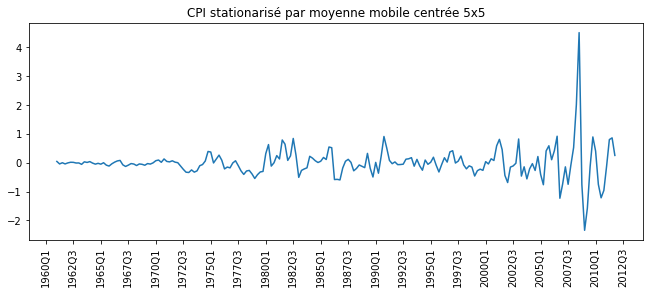

In [39]:
weights = np.array([1/25, 2/25, 3/25, 4/25, 5/25, 4/25, 3/25, 2/25, 1/25])
df.loc[:, "CPI_rollmean"] = df["CPI"].rolling(9, center=True).apply(lambda x: np.sum(weights*x))

plt.figure(figsize=(11,4))
plt.plot(df["DATE"], df["CPI"] - df["CPI_rollmean"])
plt.xticks([x for i, x in enumerate(df["DATE"]) if i%10==0], rotation=90)
plt.title("CPI stationarisé par moyenne mobile centrée 5x5")
plt.show()

## Question 4
Calculer *inf*, le taux d’inflation à partir de la variable *CPI*. Faire un graphique dans le temps de *inf*. Commentez.

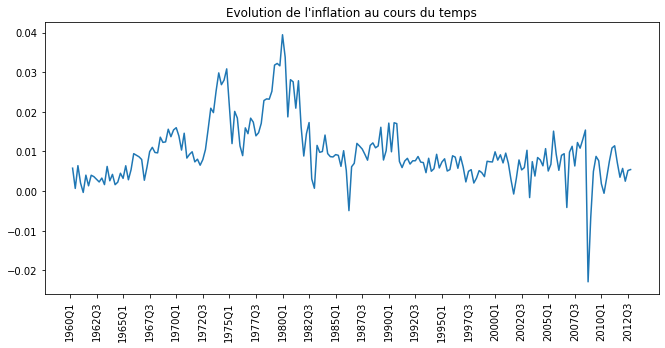

In [40]:
df.loc[:, "inf"] = df["CPI"] / df["CPI"].shift(1) - 1
plt.figure(figsize=(11, 5))
plt.plot(df["DATE"], df["inf"])
plt.title("Evolution de l'inflation au cours du temps")
plt.xticks([x for i, x in enumerate(df["DATE"]) if i%10==0], rotation=90)
plt.show()

Commentaire : taux d'inflation avait tendance à augmenter jusqu'au premier choc pétrolier de 79. Depuis la tendance est à la baisse.

## Question 5
Interpréter l'autocorrélogramme et l'autocorrélogrammes partiels de *inf*. Quelle est la différence entre ces deux graphiques ?

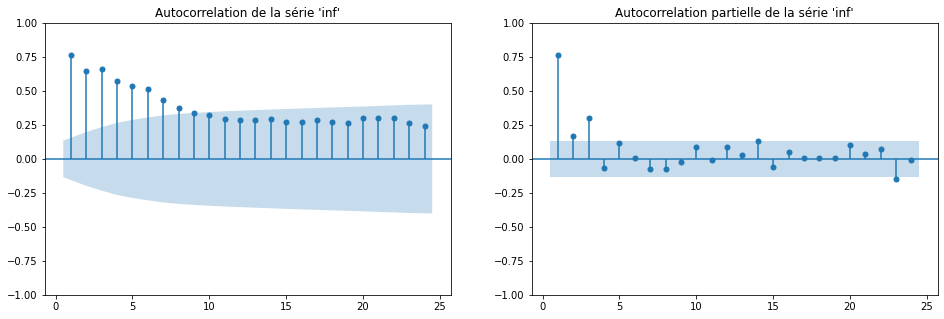

In [41]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

inf = df["inf"].dropna()
fig, axes = plt.subplots(1, 2, figsize=(16,5))
plot_acf(inf, ax=axes[0], zero=False, title="Autocorrelation de la série 'inf'")
plot_pacf(inf, ax=axes[1], zero=False, title="Autocorrelation partielle de la série 'inf'")
plt.show()

* Autocorrelation d'ordre $h$ : $\rho(h) = \frac{\gamma(h)}{\gamma(0)}$ avec $\gamma(h) = \text{cov}(Y_t, Y_{t+h})$
* Autocorrelations partielles = coéfficients de la regression linéaire sur les lags considérés (ici 25) pour prédire la valeur au temp $t$.

## Question 6
Quelle est la différence entre la stationnarité et l'ergodicité ? Pourquoi a-t-on besoin de ces deux conditions. Expliquez le terme *spurious regression*.

* Stationarité stricte : la distribution jointe de $(Y_{t+1}, Y_{t+2},\cdots, Y_{t+h})$ ne dépend pas de $h$, ie le passé et le futur se ressemblent.
* Stationarité faible : $\forall t, \mathbb{E}[Y_t] = \mu$ et $\forall t, \forall h, \text{cov}(Y_t, Y_{t+h}) = \gamma(h)$
* Ergodicité : $\underset{h \rightarrow \infty}{\lim} \rho(h) = 0$, ie le processus oublie les conditions initiales

Ces deux conditions sont nécessaires car elles permettent, pour la première, d'appliquer le Théorème Central Limite et pour la seconde, de faire correspondre la moyenne temporelle et la moyenne spatiale (Théorème ergodique) et ainsi analyser le processus en analysant une seule trajectoire.

*Spurious Regression* : corrélation n'est pas causation. Deux variables peuvent sembler corrélées alors que c'est une coincidence ou dû à une autre variable non observée.

## Question 7
Faire le test Augmented Dickey Fuller pour *inf* en utilisant utilisant le critère AIC pour déterminer le nombre de lags à inclure. Commenter.

In [42]:
from statsmodels.tsa.stattools import adfuller

adf_results = adfuller(inf, autolag="AIC")

print(f"ADF Stat : {adf_results[0]:.3f}, p-value : {adf_results[1]:.3e}")
print(f"Nombre de lags utilisés : {adf_results[2]}")
print("Valeurs critiques :")
for k, v in adf_results[4].items():
    print(f"    [{k} : {v:.4f}]")

ADF Stat : -2.919, p-value : 4.318e-02
Nombre de lags utilisés : 2
Valeurs critiques :
    [1% : -3.4622]
    [5% : -2.8755]
    [10% : -2.5742]


La p-value est inférieure à 5%, on peut donc rejeter l'hypothèse nulle qui est que la série n'est pas stationaire. La série est donc stationaire.

## Question 8
Proposer une modélisation AR(p) de *inf*, en utilisant tous les outils vus au cours.

In [43]:
from pmdarima import ARIMA

# modèle ARIMA(p,0,0) = AR(p)
ar = ARIMA((2,0,0))

ar.fit(df["inf"])
preds = ar.predict_in_sample()

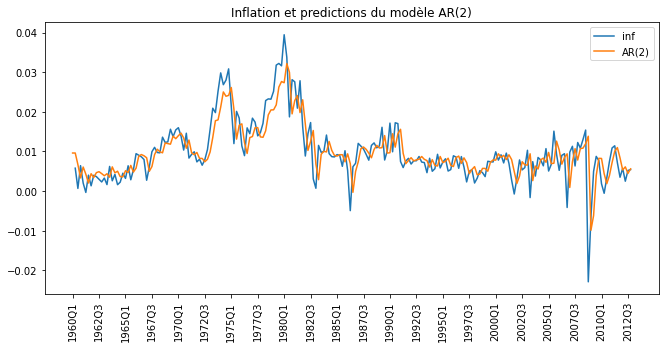

In [44]:
plt.figure(figsize=(11, 5))
plt.plot(df["DATE"], df["inf"], label="inf")
plt.plot(df["DATE"], preds, label="AR(2)")
plt.title("Inflation et predictions du modèle AR(2)")
plt.legend()
plt.xticks([x for i, x in enumerate(df["DATE"]) if i%10==0], rotation=90)
plt.show()

## Question 9
Estimer le modèle de la courbe de Philips qui explique le taux de chômage (*Unemp*) en fonction du taux d’inflation courant et une constante.

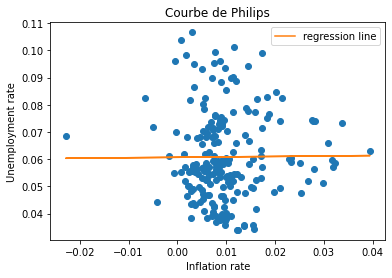

In [45]:
# on passe la variable `Unemp` à la même échelle que `inf`
df.loc[:, "Unemp"] = df["Unemp"] / 100
X9 = inf
y9 = df["Unemp"].iloc[1:]
X9 = sm.add_constant(X9)
model9 = sm.OLS(y9, X9)
results9 = model9.fit()
preds = model9.predict(results9.params, X9)

plt.figure(figsize=(6,4))
plt.scatter(inf, y9)
plt.plot(inf, preds, color="C1", label="regression line")
plt.title("Courbe de Philips")
plt.xlabel("Inflation rate")
plt.ylabel("Unemployment rate")
plt.legend()
plt.show()

## Question 10

Tester l’autocorrélation des erreurs.

Pour tester l'autocorrélation des erreurs, on définit le modèle autorégressif suivant : $u_t = \rho u_{t-1} + \epsilon$ où $u_t$ est le résidu au temps $t$.

On teste l'hypothèse $H_0 : \rho = 0$ avec un test de Student.

In [46]:
u = results9.resid.iloc[1:]
X10 = results9.resid.shift(1).iloc[1:]

model10 = sm.OLS(u, X10)
results10 = model10.fit()
print(results10.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.956
Model:                            OLS   Adj. R-squared (uncentered):              0.956
Method:                 Least Squares   F-statistic:                              4557.
Date:                Tue, 10 May 2022   Prob (F-statistic):                   6.88e-144
Time:                        16:16:18   Log-Likelihood:                          896.68
No. Observations:                 210   AIC:                                     -1791.
Df Residuals:                     209   BIC:                                     -1788.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Comme indiqué dans le résumé du modèle OLS de *statsmodels*, la p-valeur du test de Student pour le coéfficient du modèle est 0.000 donc on peut rejeter l'hypothèse nulle à 1%. Les erreurs sont autocorrélées.

## Question 11

Corriger l’autocorrélation des erreurs par la méthode vue en cours.

Pour corriger l'autocorrélation, on transforme le modèle comme suit :
$$
y_t - \rho y_{t-1} = \beta_0 + \beta_1 (X_t - \rho X_{t-1})
$$

In [47]:
rho = results10.params[0]
y11 = df["Unemp"] - rho * df["Unemp"].shift(1)
y11 = y11.iloc[2:]
X11 = df["inf"] - rho * df["inf"].shift(1)
X11 = X11.iloc[2:]
X11 = sm.add_constant(X11)

model11 = sm.OLS(y11, X11)
results11 = model11.fit()
print(results11.summary())

                            OLS Regression Results                            
Dep. Variable:                  Unemp   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     5.203
Date:                Tue, 10 May 2022   Prob (F-statistic):             0.0236
Time:                        16:16:18   Log-Likelihood:                 900.29
No. Observations:                 210   AIC:                            -1797.
Df Residuals:                     208   BIC:                            -1790.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0014      0.000      5.909      0.0

## Question 12

Tester la stabilité de la relation chômage-inflation sur deux sous-périodes de taille identique.

Il s'agit de réaliser un Test de Chow:
* Modèle contraint : régression sur l'ensemble de la période -> $SSR1$
* 2 modèles non-contraints : régressions sur les sous-périodes -> $SSR0_{total} = SSR0_1 + SSR0_2$.

* L'hypothèse nulle $H_0$ est que les coéfficients de régression des 3 modèles sont les mêmes.

* On calcul la statistique de Fisher : $F = \frac{(SSR0_{total} - SSR1) / c}{ SSR0_{total} / ddl}$
avec $ddl = n-2(p+1)$ et restrictions : $c = p + 1$.



In [48]:
def chow_test(X, y):
    # modèle contraint
    model1 = sm.OLS(y, X).fit()
    SSR1 = model1.resid.T @ model1.resid
    # point de split du dataset en 2 parts égales
    split_point = X.shape[0] // 2
    X1 = X.iloc[:split_point]
    y1 = y.iloc[:split_point]
    X2 = X.iloc[split_point:]
    y2 = y.iloc[split_point:]
    # résidus des 2 sous-modèles non-contraints 
    SSR0_1 = calc_ssr(X1, y1)
    SSR0_2 = calc_ssr(X2, y2)
    # nombre de restrictions:
    c = X.shape[1]
    ddl = X.shape[0] - 2 * c
    # stat de Fisher et p-value
    F, p_val = calc_fisher(SSR0_1+SSR0_2, SSR1, c, ddl)
    if p_val < 0.05:
        print("On rejette l'hypothèse de stabilité de la relation chômage-inflation à 5%")
    else:
        print("On ne rejette par l'hypothèse nulle à 5%")
    return F, p_val

In [49]:
# en repartant du modèle de la question 11
_ = chow_test(X11, y11)

F-stat : 4.478, p-value : 1.25e-02
On rejette l'hypothèse de stabilité de la relation chômage-inflation à 5%


In [50]:
# en repartant du modèle de la question 9
_ = chow_test(X9, y9)

F-stat : 1.942, p-value : 1.46e-01
On ne rejette par l'hypothèse nulle à 5%


## Question 13
Estimer la courbe de Philips en supprimant l'inflation courante des variables explicatives mais en ajoutant les délais d’ordre 1, 2, 3 et 4 de l’inflation et du chômage. Faire le test de Granger de non causalité de l’inflation sur le chômage. Donnez la p-valeur.

In [51]:
X13 = df[["inf", "Unemp"]]
X13 = pd.concat([X13.shift(i) for i in range(1,5)], axis=1).iloc[5:]
cols = []
for i in range(1,5):
    cols.append(f"inf_{i}")
    cols.append(f"Unemp_{i}")
X13.columns = cols
X13 = sm.add_constant(X13)

y13 = df["Unemp"].iloc[5:]

X13.head()

,const,inf_1,Unemp_1,inf_2,Unemp_2,inf_3,Unemp_3,inf_4,Unemp_4
5,1.0,0.002015,0.0680,0.006421,0.0627,0.000676,0.0553,0.005782,0.0523
6,1.0,-0.000335,0.0700,0.002015,0.0680,0.006421,0.0627,0.000676,0.0553
7,1.0,0.004023,0.0677,-0.000335,0.0700,0.002015,0.0680,0.006421,0.0627
8,1.0,0.001336,0.0620,0.004023,0.0677,-0.000335,0.0700,0.002015,0.0680
9,1.0,0.004001,0.0563,0.001336,0.0620,0.004023,0.0677,-0.000335,0.0700


Coéfficients de régression:
 const      0.001457
inf_1      0.031105
Unemp_1    1.593705
inf_2     -0.023578
Unemp_2   -0.647169
inf_3      0.068949
Unemp_3    0.022248
inf_4      0.016329
Unemp_4   -0.007975
dtype: float64


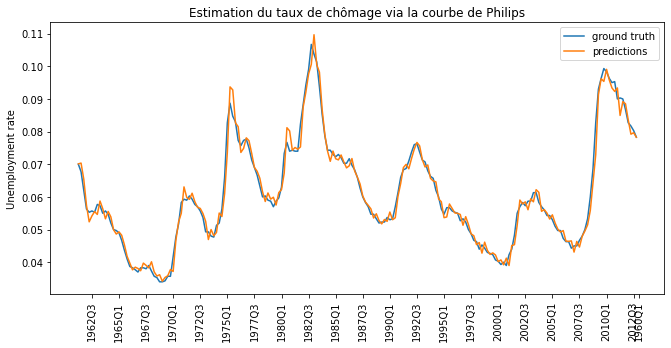

In [52]:
model13 = sm.OLS(y13, X13)
results13 = model13.fit()
preds = model13.predict(results13.params, X13)
print("Coéfficients de régression:\n",results13.params)

plt.figure(figsize=(11,5))
plt.plot(df["DATE"].iloc[5:], y13, label="ground truth")
plt.plot(df["DATE"].iloc[5:], preds, color="C1", label="predictions")
plt.title("Estimation du taux de chômage via la courbe de Philips")
#plt.xlabel("")
plt.ylabel("Unemployment rate")
plt.xticks([x for i, x in enumerate(df["DATE"]) if i%10==0], rotation=90)
plt.legend()
plt.show()

On réalise le test de Granger. Il s'agit d'un test de Fisher avec pour paramètres :
* $H_0$ : les variables liées à l'inflation ne sont pas significatives pour le modèle (ie non causalité de l'inflation sur le chômage)
* modèle non contraint : on prend en compte toutes les variables
* modèle contraint : on retire les variables liées à l'inflation

In [53]:
fisher_test(X13, y13, [f"inf_{i}" for i in range(1,5)], 0.95)

F-stat : 3.797, p-value : 5.35e-03
Avec seuil de significativité de 5.00%, on rejette H0


## Question 14

Représentez graphiquement les délais distribués et commentez. Calculer l’impact à long de terme de l’inflation sur le chômage.

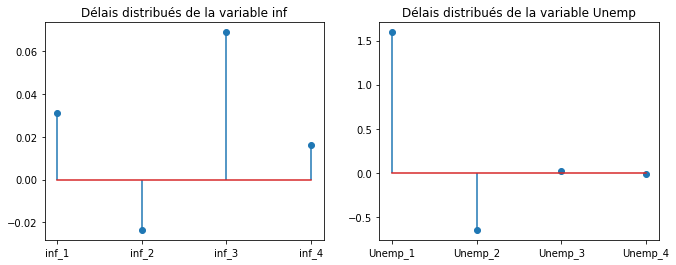

In [54]:
inf_coef = [results13.params[f"inf_{i}"] for i in range(1,5)]
inf_tick = [col for col in X13.columns if "inf" in col]
unemp_coef = [results13.params[f"Unemp_{i}"] for i in range(1,5)]
unemp_tick = [col for col in X13.columns if "Unemp" in col]

fig, axes = plt.subplots(1,2, figsize=(11,4))
axes[0].stem(inf_tick, inf_coef)
axes[0].set_xticklabels(inf_tick)
axes[0].set_title("Délais distribués de la variable inf")

axes[1].stem(unemp_tick, unemp_coef)
axes[1].set_xticklabels(unemp_tick)
axes[1].set_title("Délais distribués de la variable Unemp")

plt.show()

Pour le modèle,
$$
y_t = \beta_0 + \sum_{k=1}^{4} \beta_k y_{t-k} + \sum_{j=1}^{4}\alpha_j x_{t-j} + u_t
$$
le coéfficient long-terme de $x$ sur $y$ est : $$\theta = \frac{\sum_{j=1}^4 \alpha_j}{1 - \sum_{k=1}^4 \beta_k}$$

In [55]:
theta = np.sum(inf_coef) / (1- np.sum(unemp_coef))

print(f"Coéfficient long terme de l'inflation sur le chômage: {theta:.3f}")

Coéfficient long terme de l'inflation sur le chômage: 2.368
